In [ ]:
import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
adata = sc.read_h5ad("/home/aih/shrey.parikh/PDAC/PDAC/concatenated_datasets/PDAC_concat_hvg_batch_key_datasets_hvg.h5ad")

/home/aih/shrey.parikh/miniconda3/envs/PDAC/lib/python3.12/site-packages/anndata/_core/anndata.py:1906: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [13]:
adata.obs['Condition'] = np.where(adata.obs.Dataset == 'Regev', 'snRNA', 'scRNA')

In [ ]:
cell_counts = adata.obs.groupby(['Condition', 'Dataset']).size().reset_index(name='Count')


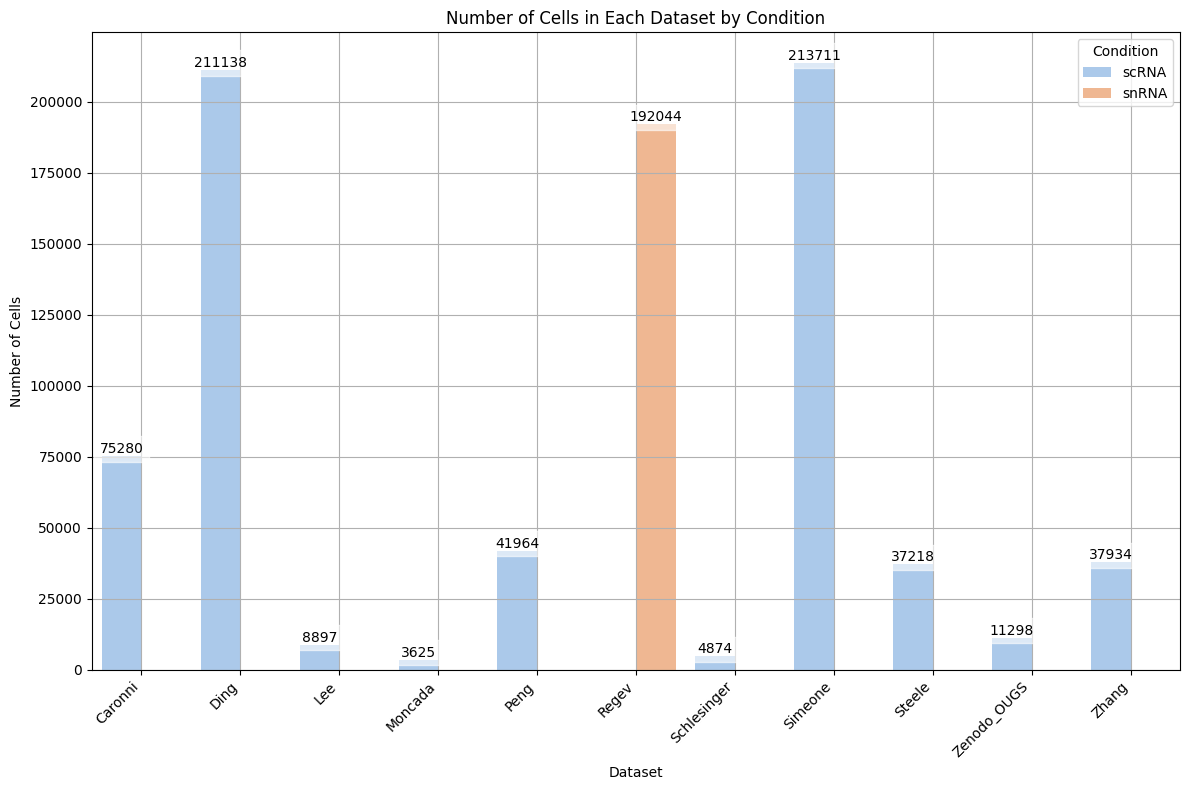

In [125]:
plt.figure(figsize=(12, 8))  # Increased figure size
barplot = sns.barplot(x='Dataset', y='Count', hue='Condition', data=cell_counts, palette='pastel')

plt.title('Number of Cells in Each Dataset by Condition')
plt.xlabel('Dataset')
plt.ylabel('Number of Cells')
plt.xticks(rotation=45, ha="right")  # Ha aligns the rotation of the x-tick labels
plt.legend(title='Condition')

# Adding annotations on top of each bar, improved
for p in barplot.patches:
    if p.get_height() > 0:  # Skip zero values
        _x = p.get_x() + p.get_width() / 2
        _y = p.get_height()
        value = '{:.0f}'.format(p.get_height())
        barplot.text(_x, _y, value, ha="center", va="bottom", 
                     rotation=0, color='black', 
                     bbox=dict(facecolor='white', edgecolor='white', alpha=0.6))
plt.grid()
plt.tight_layout()
plt.show()


/tmp/ipykernel_600794/2110551435.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df["Dataset"], rotation=45, ha='right')


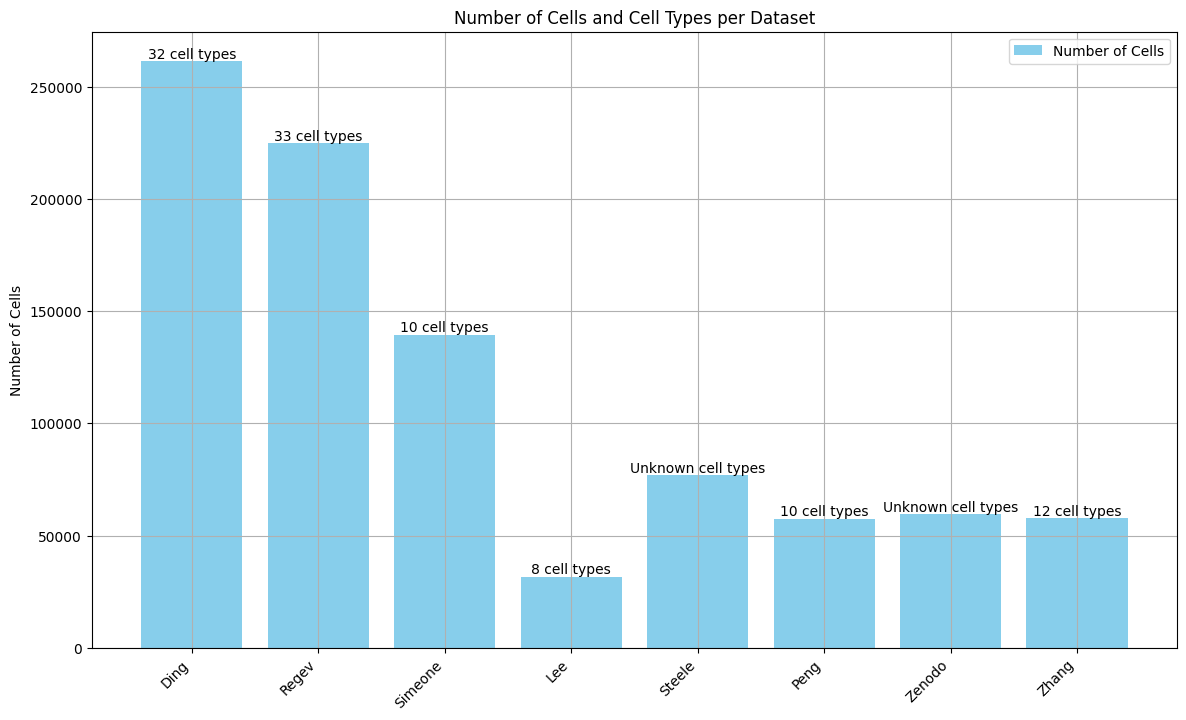

In [122]:

datasets = {
    "Ding": {"Patients": 31, "Samples": 83, "Cells": 261497, "Cell Types": 32},
    "Regev": {"Patients": 48, "Samples": 43, "Cells": 224988, "Cell Types": 33},
    "Simeone": {"Patients": 27, "Samples": 27, "Cells": 139446, "Cell Types": 10},
    "Lee": {"Patients": 9, "Samples": 9, "Cells": 31720, "Cell Types": 8},
    "Steele": {"Patients": 19, "Samples": 16, "Cells": 76798, "Cell Types": "Unknown"},
    "Peng": {"Patients": 35, "Samples": 35, "Cells": 57530, "Cell Types": 10},
    "Zenodo": {"Patients": "Unknown", "Samples": "Unknown", "Cells": 59569, "Cell Types": "Unknown"},
    "Zhang": {"Patients": 4, "Samples": 8, "Cells": 57702, "Cell Types": 12}
}

# Creating a DataFrame
df = pd.DataFrame(datasets).T.reset_index()
df.rename(columns={"index": "Dataset"}, inplace=True)

# Plotting
fig, ax = plt.subplots(figsize=(14, 8))

# Bar plot for number of cells
ax.bar(df["Dataset"], df["Cells"], color='skyblue', label='Number of Cells')

# Adding annotations for cell type counts
for i, row in df.iterrows():
    ax.text(i, row["Cells"], f"{row['Cell Types']} cell types", ha='center', va='bottom', rotation=0, color='black')

# Formatting the plot
ax.set_ylabel('Number of Cells')
ax.set_title('Number of Cells and Cell Types per Dataset')
ax.set_xticklabels(df["Dataset"], rotation=45, ha='right')
plt.grid()
plt.legend()
plt.show()


In [49]:
zenodo =sc.read_h5ad('/home/aih/shrey.parikh/PDAC/PDAC/processed_datasets/All_genes/zenodo_PDAC_new.h5ad')

In [83]:
patient_ids_per_dataset = zenodo.obs.groupby('Dataset')['Patient'].apply(lambda x: x.unique()).reset_index(name='Patient IDs')
patient_ids_per_dataset

/tmp/ipykernel_600794/675850469.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  patient_ids_per_dataset = zenodo.obs.groupby('Dataset')['Patient'].apply(lambda x: x.unique()).reset_index(name='Patient IDs')


,Dataset,Patient IDs
0,Moncada,"['GSE111672_PDAC_A', 'GSE111672_PDAC_B'] Categ..."
1,Schlesinger,"['GSM4293555'] Categories (7, object): ['GSE11..."
2,Zenodo_OUGS,"['pk201127', 'pk210128', 'pk210216', 'pk210318..."


In [84]:
zenodo[zenodo.obs.Dataset == 'Schlesinger'].obs.columns

Index(['CELL', 'Patient', 'Type', 'Cell_type', 'celltype0', 'celltype1',
       'celltype2', 'celltype3', 'Patient2', 'nCount_RNA', 'nFeature_RNA',
       'Project', 'orig.ident', 'Stage', 'Grade', 'Gender', 'Age',
       'Percent_mito', 'Percent_ribo', 'Percent_hemo', 'percent.mt',
       'predicted.id', 'prediction.score.Fibroblast.cell',
       'prediction.score.Stellate.cell', 'prediction.score.Macrophage.cell',
       'prediction.score.Endothelial.cell', 'prediction.score.T.cell',
       'prediction.score.B.cell', 'prediction.score.Ductal.cell.type.2',
       'prediction.score.Endocrine.cell',
       'prediction.score.Ductal.cell.type.1', 'prediction.score.Acinar.cell',
       'prediction.score.max', 'classical_score1', 'basal_score1',
       'classical_score21', 'basal_score21', 'endocrine_score_1',
       'immune_score_1', 'exocrine_score_1', 'activated_stroma_score_1',
       'histone_score_1', 'normal_stroma_score_1', 'olfactory_score_1',
       'na_score_1', 'Dataset', 'ID'],

In [82]:
zenodo[zenodo.obs.Dataset == 'Schlesinger'].obs['Patient']

AAACCTGAGCTTATCG.1    GSM4293555
AAACCTGAGGGTTCCC.1    GSM4293555
AAACCTGGTACGACCC.1    GSM4293555
AAACCTGGTCCTGCTT.1    GSM4293555
AAACCTGTCTCCGGTT.1    GSM4293555
                         ...    
TTTGTCACAATCAGAA.3    GSM4293555
TTTGTCACATTGAGCT.3    GSM4293555
TTTGTCAGTTACGCGC.3    GSM4293555
TTTGTCAGTTCTGAAC.3    GSM4293555
TTTGTCATCTGCCAGG.3    GSM4293555
Name: Patient, Length: 4874, dtype: category
Categories (1, object): ['GSM4293555']

In [85]:
patient_ids_per_dataset['Patient IDs'].apply(lambda x: len(x))

0    2
1    1
2    4
Name: Patient IDs, dtype: int64

In [89]:
zenodo

AnnData object with n_obs × n_vars = 19797 × 34726
    obs: 'CELL', 'Patient', 'Type', 'Cell_type', 'celltype0', 'celltype1', 'celltype2', 'celltype3', 'Patient2', 'nCount_RNA', 'nFeature_RNA', 'Project', 'orig.ident', 'Stage', 'Grade', 'Gender', 'Age', 'Percent_mito', 'Percent_ribo', 'Percent_hemo', 'percent.mt', 'predicted.id', 'prediction.score.Fibroblast.cell', 'prediction.score.Stellate.cell', 'prediction.score.Macrophage.cell', 'prediction.score.Endothelial.cell', 'prediction.score.T.cell', 'prediction.score.B.cell', 'prediction.score.Ductal.cell.type.2', 'prediction.score.Endocrine.cell', 'prediction.score.Ductal.cell.type.1', 'prediction.score.Acinar.cell', 'prediction.score.max', 'classical_score1', 'basal_score1', 'classical_score21', 'basal_score21', 'endocrine_score_1', 'immune_score_1', 'exocrine_score_1', 'activated_stroma_score_1', 'histone_score_1', 'normal_stroma_score_1', 'olfactory_score_1', 'na_score_1', 'Dataset', 'ID'
    var: '1'
    obsm: 'X_pca', 'X_umap'

In [105]:
for dataset in adata.obs.Dataset.unique():
    temp_adata = adata[adata.obs.Dataset == dataset]
    print(f'{dataset} contains {temp_adata.shape[0]} cells and {temp_adata.shape[1]} genes.')

Ding contains 211138 cells and 4260 genes.
Lee contains 8897 cells and 4260 genes.
Regev contains 192044 cells and 4260 genes.
Simeone contains 213711 cells and 4260 genes.
Steele contains 37218 cells and 4260 genes.
Peng contains 41964 cells and 4260 genes.
Caronni contains 75280 cells and 4260 genes.
Zhang contains 37934 cells and 4260 genes.
Moncada contains 3625 cells and 4260 genes.
Schlesinger contains 4874 cells and 4260 genes.
Zenodo_OUGS contains 11298 cells and 4260 genes.


In [98]:
caronni = sc.read_h5ad('/home/aih/shrey.parikh/PDAC/PDAC/processed_datasets/All_genes/Caronni_concat.h5ad')

/home/aih/shrey.parikh/miniconda3/envs/PDAC/lib/python3.12/site-packages/anndata/_core/anndata.py:1906: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [ ]:

datasets = {
    "Ding": {"Patients": 31, "Samples": 83, "Cells": 261497, "Cell Types": 32},
    "Regev": {"Patients": 48, "Samples": 43, "Cells": 224988, "Cell Types": 33},
    "Simeone": {"Patients": 27, "Samples": 27, "Cells": 139446, "Cell Types": 10},
    "Lee": {"Patients": 9, "Samples": 9, "Cells": 31720, "Cell Types": 8},
    "Steele": {"Patients": 19, "Samples": 16, "Cells": 76798, "Cell Types": "Unknown"},
    "Peng": {"Patients": 35, "Samples": 35, "Cells": 57530, "Cell Types": 10},
    "Zenodo_OUGs": {"Patients": 4, "Samples": "Unknown", "Cells": 19797, "Cell Types": 10},
    "Zhang": {"Patients": 4, "Samples": 8, "Cells": 57702, "Cell Types": 12},
    "Caronni": {"Patients": 4, "Samples": 4, "Cells": 57702, "Cell Types": 12},
    
}

# Creating a DataFrame
df = pd.DataFrame(datasets).T.reset_index()
df.rename(columns={"index": "Dataset"}, inplace=True)

# Plotting
fig, ax = plt.subplots(figsize=(14, 8))

# Bar plot for number of cells
ax.bar(df["Dataset"], df["Samples"], color='skyblue', label='Number of Donors')

# # Adding annotations for cell type counts
# for i, row in df.iterrows():
#     ax.text(i, row["Cells"], f"{row['Cell Types']} cell types", ha='center', va='bottom', rotation=45, color='black')

#TODO: remove commented code if not necessary

# Formatting the plot
ax.set_ylabel('Number of Cells')
ax.set_title('Number of Cells and Cell Types per Dataset')
ax.set_xticklabels(df["Dataset"], rotation=45, ha='right')

plt.legend()
plt.show()


In [ ]:
Ding contains 211138 cells and 4260 genes.
Lee contains 8897 cells and 4260 genes.
Regev contains 192044 cells and 4260 genes.
Simeone contains 213711 cells and 4260 genes.
Steele contains 37218 cells and 4260 genes.
Peng contains 41964 cells and 4260 genes.
Caronni contains 75280 cells and 4260 genes.
Zhang contains 37934 cells and 4260 genes.
Moncada contains 3625 cells and 4260 genes.
Schlesinger contains 4874 cells and 4260 genes.
Zenodo_OUGS contains 11298 cells and 4260 genes.
#TODO: remove?

In [106]:
simeone = sc.read_h5ad('/home/aih/shrey.parikh/PDAC/PDAC/processed_datasets/All_genes/Simeone_concat.h5ad')

/home/aih/shrey.parikh/miniconda3/envs/PDAC/lib/python3.12/site-packages/anndata/_core/anndata.py:1906: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


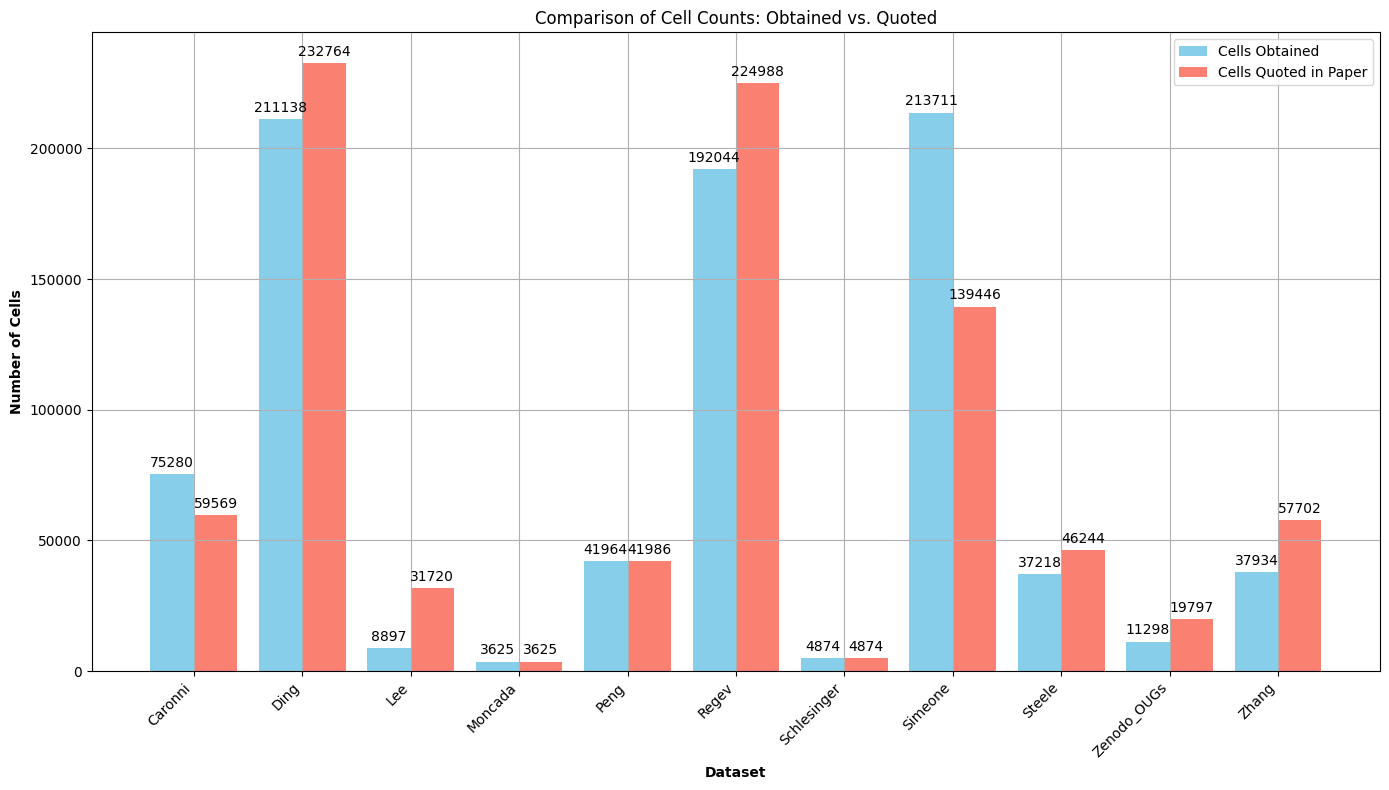

In [129]:

cells_have = {
    'Caronni': 75280,
    'Ding': 211138,
    'Lee': 8897,
    'Moncada': 3625,
    'Peng': 41964,
    'Regev': 192044,
    'Schlesinger': 4874,
    'Simeone': 213711,
    'Steele': 37218,
    'Zenodo_OUGs': 11298,
    'Zhang': 37934
}

cells_quoted = {
    'Caronni': 59569,
    'Ding': 232764,
    'Lee': 31720,
    'Moncada': 3625,
    'Peng': 41986,
    'Regev': 224988,
    'Schlesinger': 4874,
    'Simeone': 139446,
    'Steele': 46244,
    'Zenodo_OUGs': 19797,
    'Zhang': 57702
}

# Sort keys to ensure the bars match up
datasets = sorted(cells_have.keys())

# Collect the corresponding values, ensuring the keys match between the two dictionaries
have_values = [cells_have[dataset] for dataset in datasets]
quoted_values = [cells_quoted[dataset] for dataset in datasets]

# Plotting
fig, ax = plt.subplots(figsize=(14, 8))

# Width of a bar
bar_width = 0.4

# Positions of the bars
r1 = np.arange(len(have_values))
r2 = [x + bar_width for x in r1]

# Create bars for the cells we have
bars_have= ax.bar(r1, have_values, color='skyblue', width=bar_width, label='Cells Obtained')

# Create bars for the cells quoted in the paper
bars_quoted = ax.bar(r2, quoted_values, color='salmon', width=bar_width, label='Cells Quoted in Paper')

# Function to add value labels on the bars
def add_value_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{}'.format(height),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# Call the function for each set of bars
add_value_labels(bars_have)
add_value_labels(bars_quoted)

# Add labels, title, and legend
ax.set_xlabel('Dataset', fontweight='bold')
ax.set_ylabel('Number of Cells', fontweight='bold')
ax.set_title('Comparison of Cell Counts: Obtained vs. Quoted')
ax.set_xticks([r + bar_width/2 for r in range(len(have_values))])
ax.set_xticklabels(datasets, rotation=45, ha='right')
ax.legend()
plt.grid()
# Show the plot
plt.tight_layout()
plt.show()


/tmp/ipykernel_600794/3621052215.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  patient_counts = adata.obs.groupby('Dataset')['ID'].nunique().reset_index(name='Number of Patients')


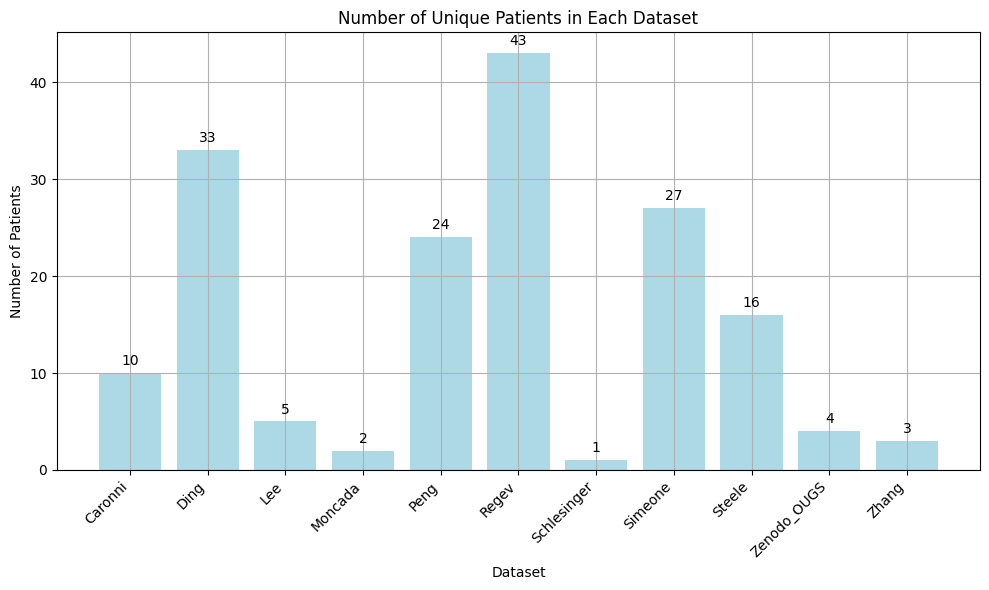

In [151]:
# Grouping by 'Dataset' and counting unique 'ID' values
patient_counts = adata.obs.groupby('Dataset')['ID'].nunique().reset_index(name='Number of Patients')

# Plotting
plt.figure(figsize=(10, 6))
barplot = plt.bar(patient_counts['Dataset'], patient_counts['Number of Patients'], color='lightblue')

# Add labels and title
plt.xlabel('Dataset')
plt.ylabel('Number of Patients')
plt.title('Number of Unique Patients in Each Dataset')

# Adding the text labels above the bars
for bar in barplot:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.5, yval, ha='center', va='bottom')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.grid()
plt.tight_layout()
plt.show()

In [160]:
datasets = {
    "Ding": {"Patients": 33,  "Cells": 261497, "Cell Types": 32},
    "Regev": {"Patients": 43,  "Cells": 224988, "Cell Types": 33},
    "Simeone": {"Patients": 27,  "Cells": 139446, "Cell Types": 10},
    "Lee": {"Patients": 5, "Cells": 31720, "Cell Types": 8},
    "Steele": {"Patients": 16,  "Cells": 76798, "Cell Types": 16},
    "Peng": {"Patients": 24, "Cells": 57530, "Cell Types": 10},
    "Zenodo_OUGs": {"Patients": 4,  "Cells": 19797, "Cell Types": 10},
    "Zhang": {"Patients": 3, "Cells": 57702, "Cell Types": 12},
    "Caronni": {"Patients": 10,  "Cells": 57702, "Cell Types": 12},
    "Moncada": {"Patients": 2,  "Cells": 3625, "Cell Types": 8},
    "Schlesinger": {"Patients": 1, "Cells": 4874, "Cell Types": 10}
    
}

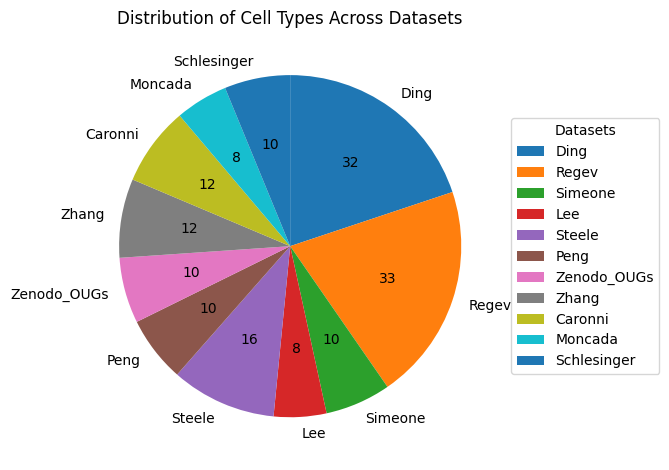

In [163]:

# Data for plotting
cell_types_counts = [datasets[dataset]["Cell Types"] for dataset in datasets]
datasets_labels = list(datasets.keys())

# Create a pie chart
fig, ax = plt.subplots()
ax.pie(cell_types_counts, labels=datasets_labels, autopct=lambda p: '{:.0f}'.format(p * sum(cell_types_counts) / 100),
        startangle=90, counterclock=False)

# Add a legend and title
ax.legend(datasets_labels, title="Datasets", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.title('Distribution of Cell Types Across Datasets')

# Show the plot
plt.tight_layout()
plt.show()

In [30]:
adata = sc.read_h5ad("/home/aih/shrey.parikh/PDAC/PDAC/concatenated_datasets/PDAC_concat_hvg_batch_key_donors_hvg_final.h5ad")

/home/aih/shrey.parikh/miniconda3/envs/PDAC/lib/python3.12/site-packages/anndata/_core/anndata.py:1906: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [31]:
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)


In [32]:
adata_qc = adata.copy()

In [33]:
sc.pp.calculate_qc_metrics(adata_qc, inplace=True)

In [34]:
datasets = adata_qc.obs['Dataset'].unique()
dataset_subsets = {ds: adata_qc[adata_qc.obs['Dataset'] == ds] for ds in datasets}

In [35]:
counts = {ds: subset.obs_vector("total_counts") for ds, subset in dataset_subsets.items()}

/home/aih/shrey.parikh/miniconda3/envs/PDAC/lib/python3.12/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


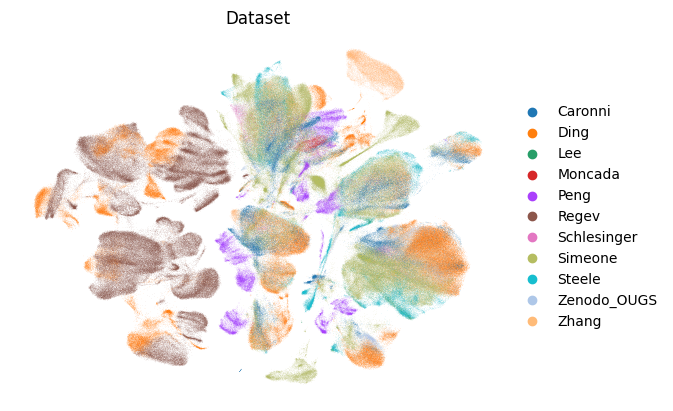

In [36]:
sc.pl.umap(adata_qc, color='Dataset', frameon=False)

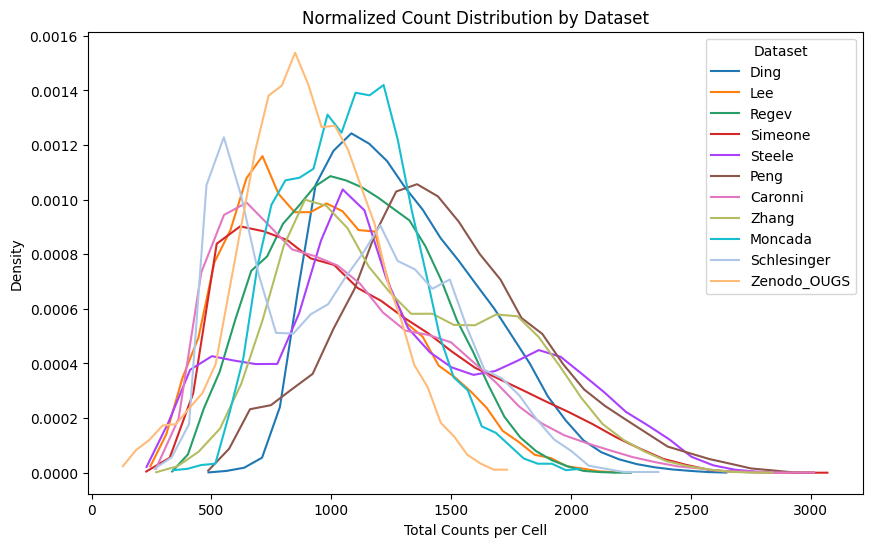

In [37]:
fig, ax = plt.subplots(figsize=(10, 6))

colors = adata_qc.uns['Dataset_colors']

for (ds, count_data), color in zip(counts.items(), colors):
    # Compute histogram data
    hist_data, bin_edges = np.histogram(count_data, bins=30, density=True)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

    # Plot as a line
    ax.plot(bin_centers, hist_data, label=ds, color=color)

ax.set_xlabel('Total Counts per Cell')
ax.set_ylabel('Density')
ax.set_title('Normalized Count Distribution by Dataset')
ax.legend(title='Dataset')

plt.show()

In [41]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_counts = {ds: scaler.fit_transform(count_data.reshape(-1, 1)).flatten() for ds, count_data in counts.items()}

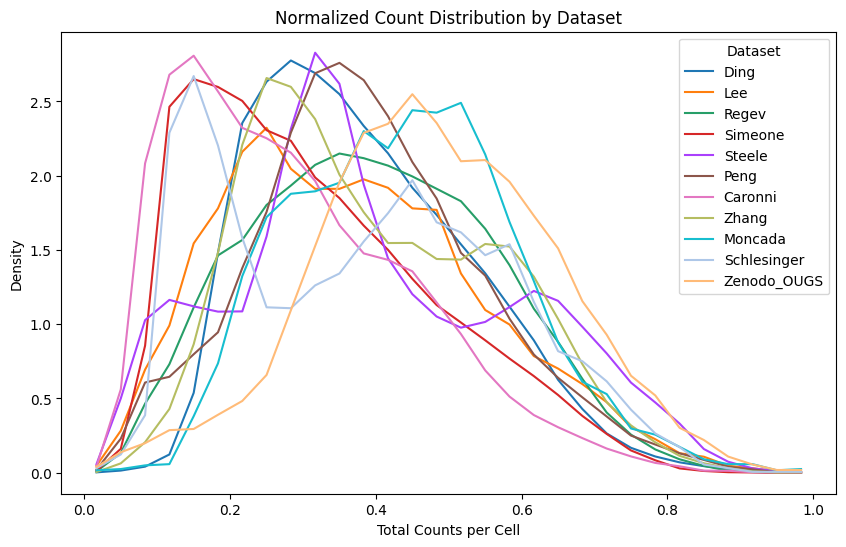

In [42]:
fig, ax = plt.subplots(figsize=(10, 6))

colors = adata_qc.uns['Dataset_colors']

for (ds, count_data), color in zip(scaled_counts.items(), colors):
    # Compute histogram data
    hist_data, bin_edges = np.histogram(count_data, bins=30, density=True)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

    # Plot as a line
    ax.plot(bin_centers, hist_data, label=ds, color=color)

ax.set_xlabel('Total Counts per Cell')
ax.set_ylabel('Density')
ax.set_title('Normalized Count Distribution by Dataset')
ax.legend(title='Dataset')

plt.show()